# Probability & Statistics for EECS:

# Homework \#12




Due on May 7, 2023 at 23:59




Name: **Zhou Shouchen**

Student ID: 2021533042

Coding part(problem 5)

(a) $Beta(2,4)$ with accept-reject method

100%|██████████| 1000000/1000000 [00:09<00:00, 109930.42it/s]


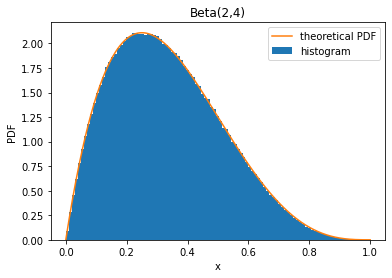

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

sample_size = 1000000

Y = np.random.uniform(0, 1, sample_size)
c = 256 / 27
FoverG = c * Y * ((1 - Y) ** 3)

X = np.zeros(sample_size)
U = np.random.uniform(0, 1, sample_size)

for i in tqdm.tqdm(range(sample_size)):
    if FoverG[i] >= U[i]:
        X[i] = Y[i]
    else:
        while True:
            y = np.random.uniform(0, 1)
            foverg = c * y * ((1 - y) ** 3)
            if np.random.uniform(0, 1) <= foverg:
                X[i] = y
                break

plt.hist(X, bins=100, density=True) # histogram of X

# Beta(2,4) PDF
def beta(x): # the PDF of the Beta(2,4)
    return 20 * x * ((1 - x) ** 3)

# theoretical PDF
x = np.linspace(0, 1, 1000) # sample points for plotting pdf
pdf = beta(x) # pdf values at sample points
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Beta(2,4)')
plt.legend(['theoretical PDF','histogram'])
plt.xticks(np.arange(0, 1.01, 0.2))
plt.show()

(b) $N(0,1)$ with accept-reject method

100%|██████████| 1000000/1000000 [00:06<00:00, 149008.02it/s]


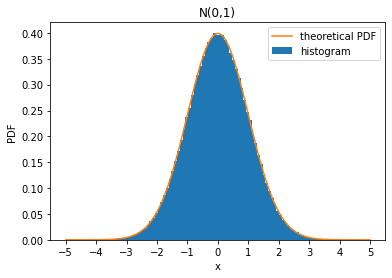

In [2]:
# Exponential Distribution 
def exponential_inverse(x): # the inverse of the exponential distribution
    return -np.log(1 - x)

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return exponential_inverse(u)

# Y ~ Expo(1)
Y = inverse_transform_sampling(sample_size) # sample points using inverse transform sampling
FoverG = np.exp(- 1 / 2 * ((Y - 1) ** 2))
Z = np.zeros(sample_size)
U = np.random.uniform(0, 1, len(Z))

for i in tqdm.tqdm(range(sample_size)):
    if FoverG[i] >= U[i]:
        Z[i] = Y[i]
    else:
        while True:
            y = inverse_transform_sampling(1)
            foverg = np.exp(- 1 / 2 * ((y - 1) ** 2))
            if np.random.uniform(0, 1) <= foverg:
                Z[i] = y
                break
            
U = np.random.uniform(0, 1, len(Z))
# if U > 1/2, then X = Z
# else X = -Z
X = np.where(U > 1 / 2, Z, -Z)

plt.hist(X, bins=100, density=True) # histogram of X

# N(0,1) PDF
def normal(x): # the PDF of N(0,1)
    return np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)

# theoretical PDF
x = np.linspace(-5, 5, 1000) # sample points for plotting pdf
pdf = normal(x) # pdf values at sample points
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('N(0,1)')
plt.legend(['theoretical PDF','histogram'])
plt.xticks(np.arange(-5,6))
plt.show()

(d) with importance sampling

In [4]:
sum = 0
for _ in range(sample_size):
    Y = np.random.normal(8, 1)
    if Y > 8:
        sum += np.exp(-8 * Y + 32)
sum /= sample_size
print("P(Y > 8) = ", sum)

P(Y > 8) =  6.242002467061207e-16


The result using important sampling method is 6.242002467061207e-16.

Which is very close to the correct answer $6.25*10^{-16}$.

So we can regard that the importance sampling method is effective and provide correct answers.